In [3]:
import pyPhyNR as pynr
from pyPhyNR.core.signal_builder import NRSignalBuilder

# Create signal with 20MHz bandwidth, numerology=1 (30kHz SCS), cell_id=1
signal = NRSignalBuilder(bandwidth_mhz=20, numerology=1, cell_id=1)

# Configure carrier with explicit FFT size and number of RBs
signal.configure_carrier(
    sample_rate=23.04e6,  # Custom sample rate
    fft_size=768,         # Custom FFT size
    cp_type="normal"
).initialize_grid()

print("Carrier Configuration:")
print(signal.get_carrier_config())


Carrier Configuration:
{'bandwidth_mhz': 20, 'numerology': 1, 'sample_rate': 23040000.0, 'fft_size': 768, 'num_rb': 51, 'cp_type': 'normal'}


In [4]:
# TDD Pattern: DDDSUUUUUU DDDDDDDDDD
# Special slot (S) = 8D2S4U

# 1. CORESET/PDCCH configuration:
# - Symbols 0-1 in slots [0,2,10,12,14,16,18]
# - 6 RBs starting at RB 0 (CORESET requires multiple of 6 RBs)
# - QPSK modulation
signal.add_coreset_pdcch(
    start_rb=0,
    num_rb=6,  # CORESET requires multiple of 6 RBs
    start_symbol=0,
    num_symbols=2,
    slot_pattern=[0,2,10,12,14,16,18],
    power=0.0
)

# 2. PDSCH configuration for slots with CORESET:
# - First 6 RBs: Symbols 2-13 (after CORESET)
# - Remaining RBs: All symbols
# - 64QAM modulation, DMRS Type A with 1 additional position
signal.add_pdsch(
    start_rb=0,
    num_rb=6,  # CORESET size
    start_symbol=2,  # After CORESET
    num_symbols=12,  # From symbol 2 to 13
    slot_pattern=[0,2,10,12,14,16,18],  # Slots with CORESET
    modulation="QAM64",
    dmrs_type="A",
    dmrs_add_pos=1,
    power=0.0
)

signal.add_pdsch(
    start_rb=6,  # After CORESET
    num_rb=45,  # Remaining RBs
    start_symbol=0,
    num_symbols=14,  # All symbols
    slot_pattern=[0,2,10,12,14,16,18],  # Slots with CORESET
    modulation="QAM64",
    dmrs_type="A",
    dmrs_add_pos=1,
    power=0.0
)

# 3. PDSCH configuration for regular DL slots:
# - All RBs (0-50)
# - All symbols (0-13)
# - 64QAM modulation, DMRS Type A with 1 additional position
signal.add_pdsch(
    start_rb=0,
    num_rb=51,  # Full bandwidth
    start_symbol=0,
    num_symbols=14,  # All symbols
    slot_pattern=[1],  # First frame DL slots without CORESET
    modulation="QAM64",
    dmrs_type="A",
    dmrs_add_pos=1,
    power=0.0
)

signal.add_pdsch(
    start_rb=0,
    num_rb=51,  # Full bandwidth
    start_symbol=0,
    num_symbols=14,  # All symbols
    slot_pattern=[11,13,15,17,19],  # Second frame DL slots without CORESET
    modulation="QAM64",
    dmrs_type="A",
    dmrs_add_pos=1,
    power=0.0
)

# 4. PDSCH configuration for special slot:
# - All RBs (0-50)
# - Symbols 0-7 (8D2S4U)
# - 64QAM modulation, DMRS Type A with no additional positions
signal.add_pdsch(
    start_rb=0,
    num_rb=51,  # Full bandwidth
    start_symbol=0,
    num_symbols=8,  # 8 DL symbols in special slot
    slot_pattern=[3],  # Special slot
    modulation="QAM64",
    dmrs_type="A",
    dmrs_add_pos=0,  # No additional positions in short allocation
    power=0.0
)


Plotting resource grid...


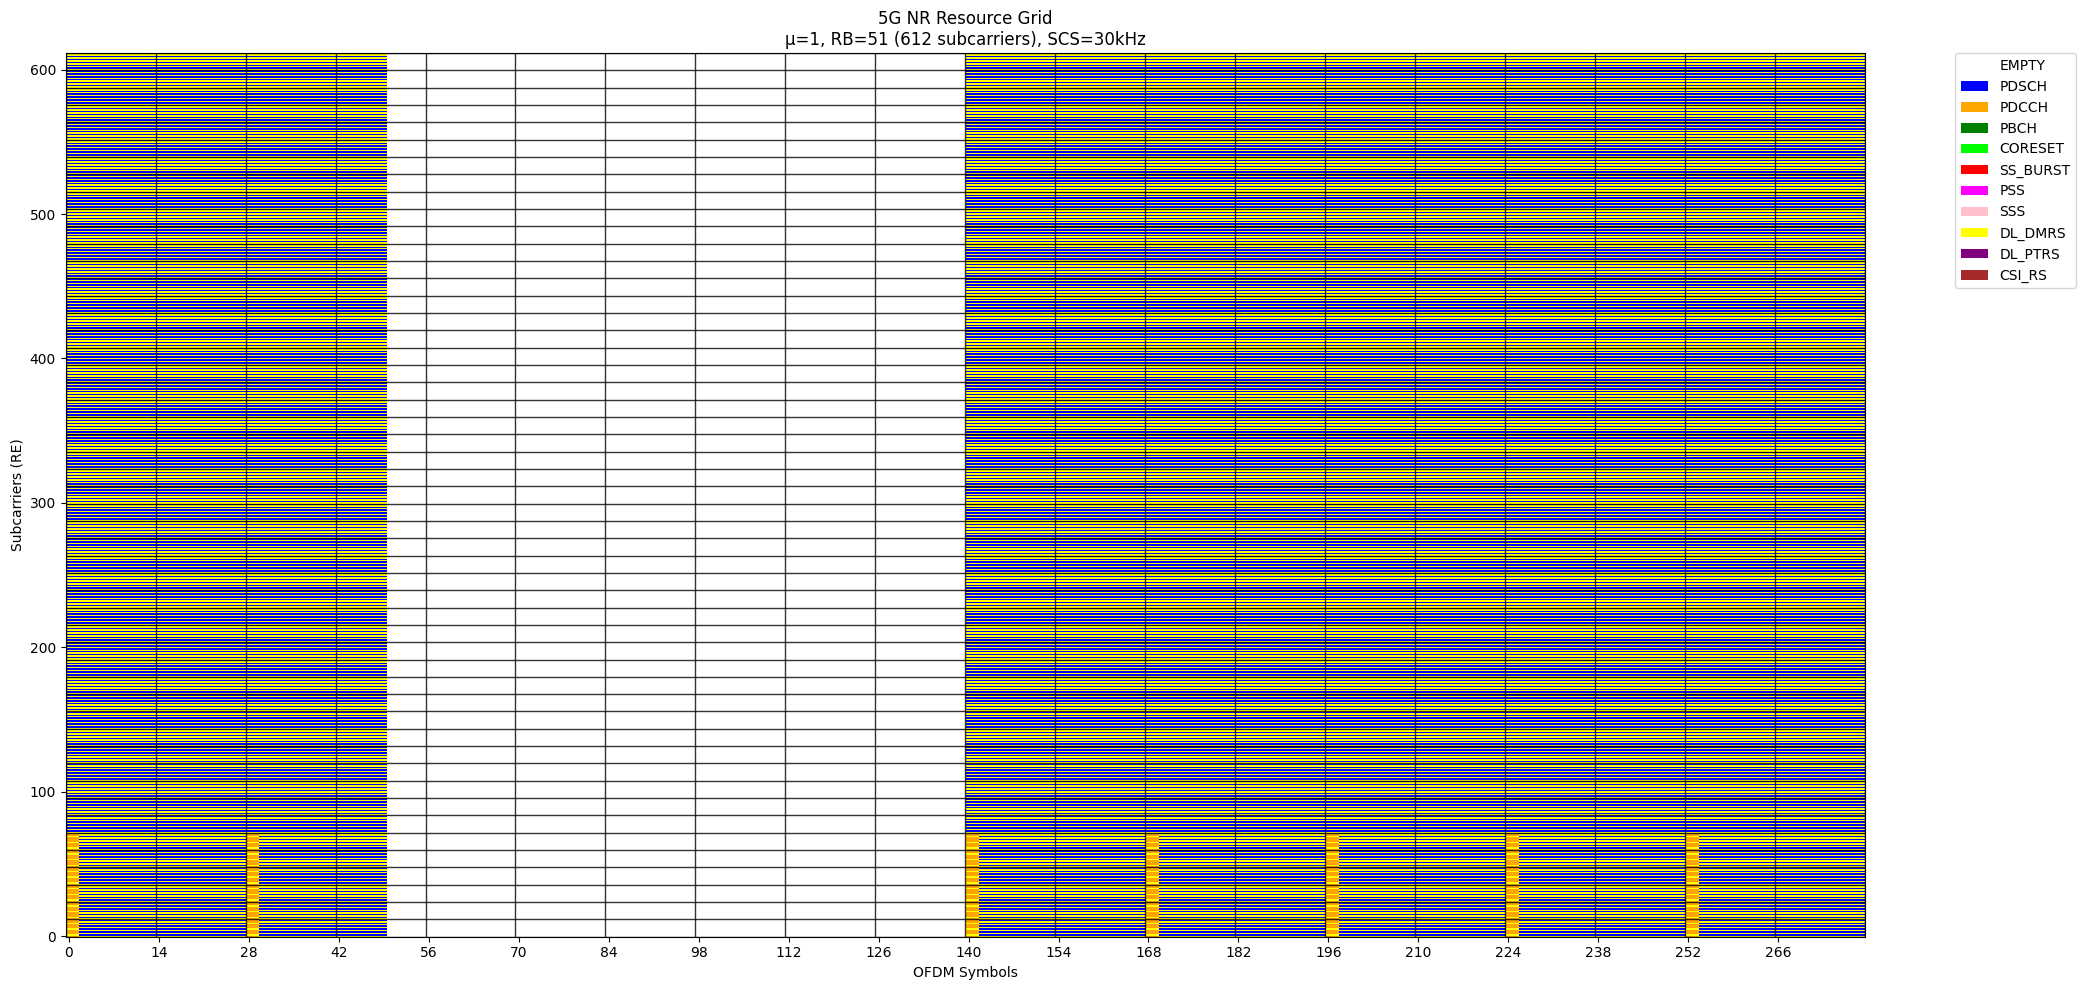

Generating waveform...


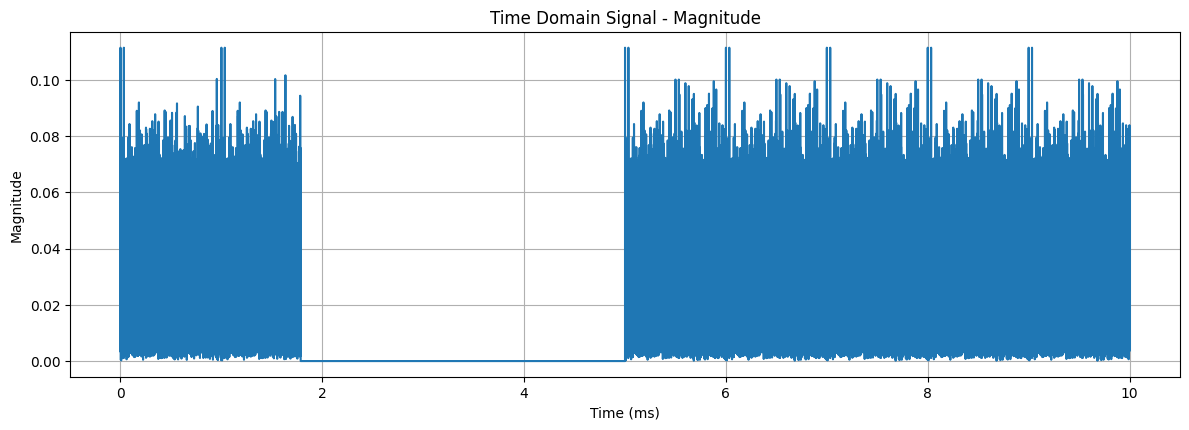

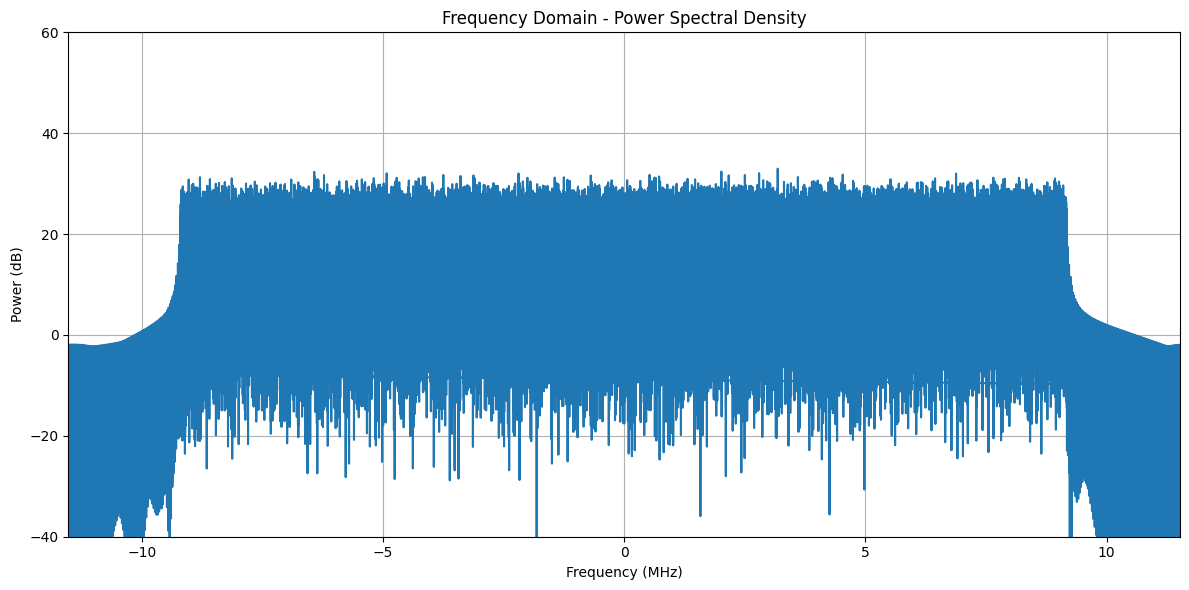

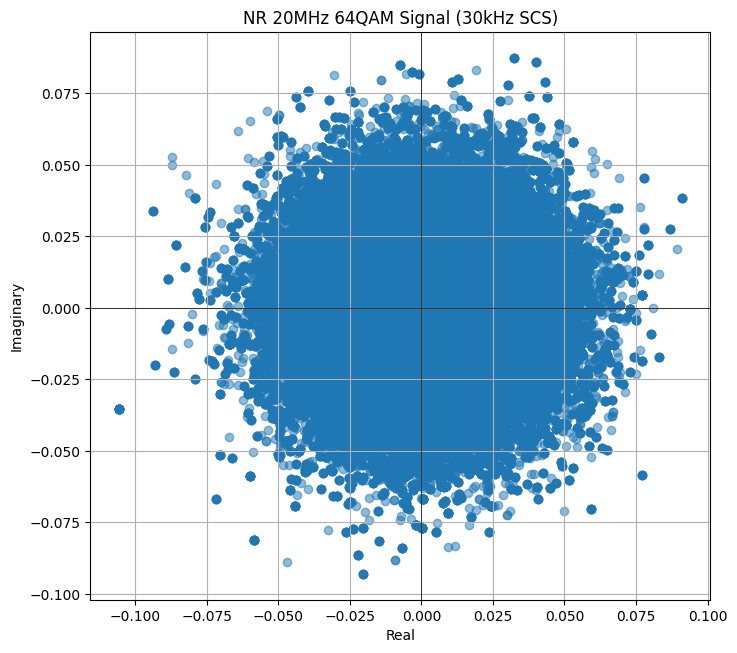

In [5]:
# Visualize resource grid
print("Plotting resource grid...")
pynr.utils.plot_grid_dl(signal.carrier_config, signal.grid)

# Generate waveform
print("Generating waveform...")
iq_samples = signal.generate_signal()

# Plot time and frequency domain
pynr.utils.plot_time_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_frequency_domain(iq_samples, signal.carrier_config)
pynr.utils.plot_constellation(iq_samples, title="NR 20MHz 64QAM Signal (30kHz SCS)")
